Introduction to Scikit-Learn

In [1]:
import pandas as pd #Data wrangling
import numpy as np #Numerical computation
import matplotlib.pyplot as plt # imports plotting package
%matplotlib inline
import matplotlib as mpl #add plotting functionalities
mpl.rcParams["figure.dpi"] = 400 #high resolution figures. dpi = dots per inch

from scipy import stats
from numpy.random import default_rng
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




In [2]:
df = pd.read_csv("CaseStudyFile/Chapter_1_cleaned_data.csv")

In [3]:
df["default payment next month"].mean()
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [4]:
"""Training the model object using scikit-learn"""
#Instantiating the class
logistic_regresion = LogisticRegression()
logistic_regresion

logistic_regresion = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, fit_intercept = True, C = 1, intercept_scaling = 1.0, class_weight = None, random_state = None, solver = 'lbfgs', max_iter = 100, multi_class = 'auto', verbose = 0, warm_start = False, n_jobs = None, l1_ratio = None)
logistic_regresion

LogisticRegression(C=1, intercept_scaling=1.0)

In [5]:

logistic_regresion.C = 0.1
logistic_regresion.solver = 'liblinear'
logistic_regresion

LogisticRegression(C=0.1, intercept_scaling=1.0, solver='liblinear')

In [6]:
"""Fitting the object model with data"""

X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [7]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
logistic_regresion.fit(X, y)

LogisticRegression(C=0.1, intercept_scaling=1.0, solver='liblinear')

In [9]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [10]:
"""Making predictions"""
logistic_regresion.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
"""True values corresponding to the prediction"""
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
rg = default_rng(12345)
X = rg.uniform(low = 0.0, high = 10.0, size = (1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [13]:
"""Creating a response variable, y"""
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc = 0.0, scale = 1.0, size = (1000,)) + intercept

Text(0, 0.5, 'y')

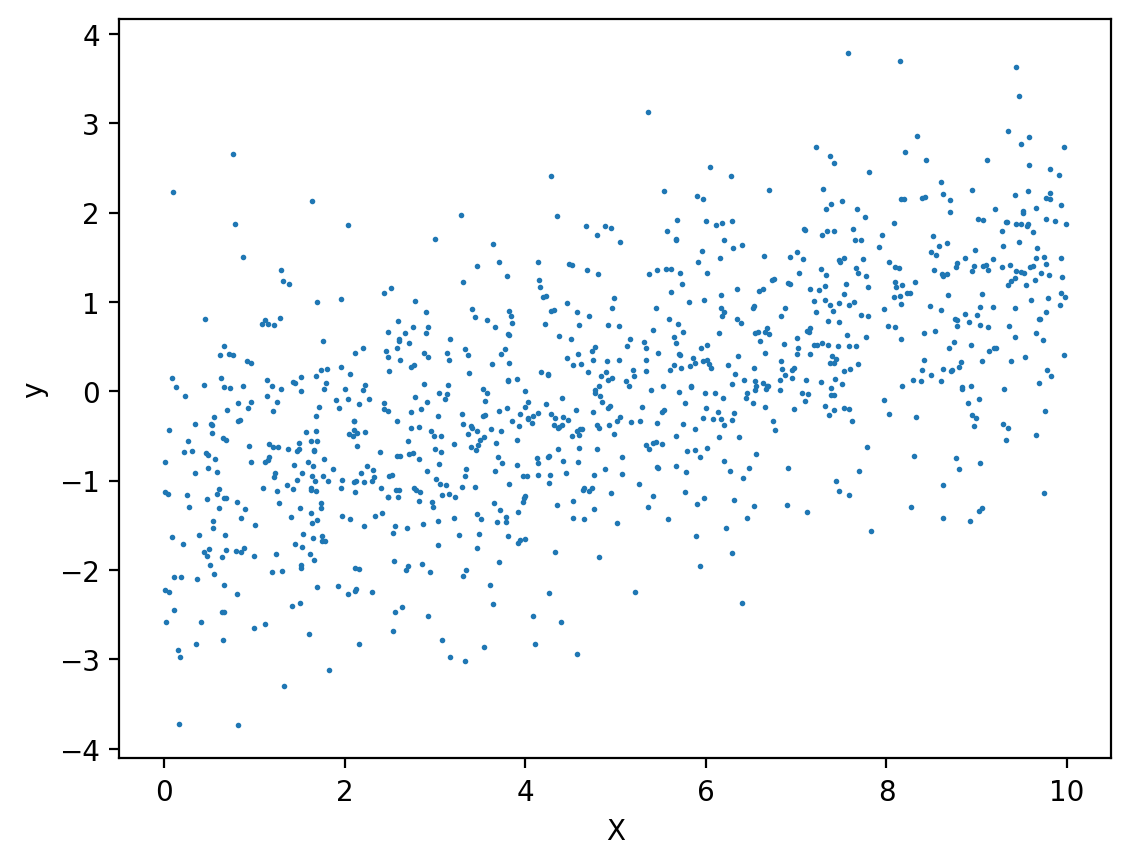

In [ ]:
mpl.rcParams["figure.dpi"] = 400.0
plt.scatter(X, y, s = 1)
plt.xlabel("X")
plt.ylabel("y")


In [15]:
"""Modeling the data"""
lin_reg = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = None)
lin_reg

LinearRegression()

In [16]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.25221972126759
[0.25711689]


Text(0, 0.5, 'y')

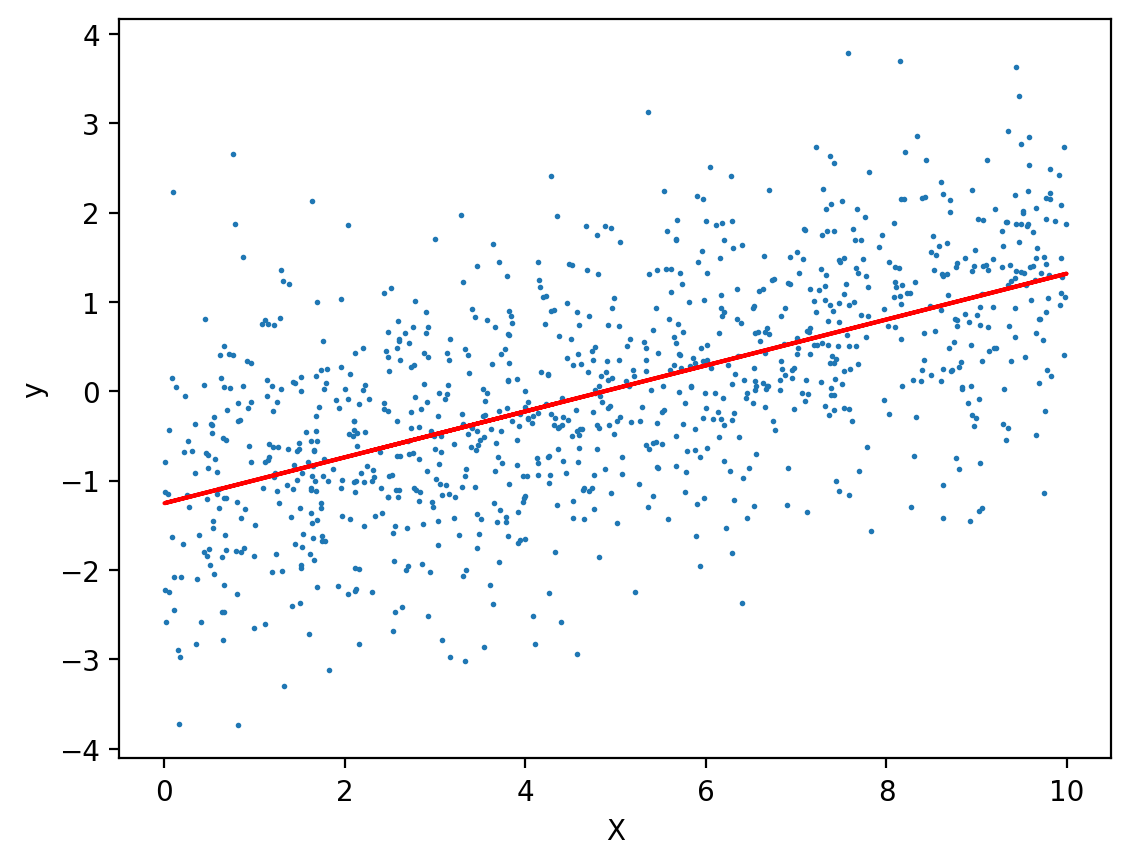

In [17]:
"""Make the predictions"""
y_predict = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X, y, s = 1)
plt.plot(X, y_predict, 'r')
plt.xlabel("X")
plt.ylabel("y")

In [18]:
"""Splitting training data"""
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [19]:
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [20]:
np.mean(y_train)

0.223102526838873

In [21]:
np.mean(y_test)

0.21657603600225014

In [22]:
example_lr = LogisticRegression(C = 0.1, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = None, solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False)

In [23]:
"""Training the model"""
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [24]:
y_pred = example_lr.predict(X_test) 

In [25]:
is_correct = y_pred == y_test

In [26]:
np.mean(is_correct)

0.7834239639977498

In [27]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [29]:
"""Calculate the number of positive samples"""
P = sum(y_test)
print(P)

1155


In [30]:
"""Calculate the number of TP(true positives)"""
TP = sum((y_test == 1) & (y_pred == 1))
print(TP)

0


In [31]:
"""Calculate the TPR(true positive rate)"""
TPR = TP/P
print(TPR)

0.0


In [32]:
"""Calculate the FN(false negative)"""
FN = sum((y_test == 1) & (y_pred == 0))
print(FN)

1155


In [33]:
"""Calculate FNR"""
FNR = FN/P
print(FNR)

1.0


In [34]:
"""Finding the TNR and FPR of our test data"""
N = sum(y_test == 0)
print(N)

4178


In [35]:
TN = sum((y_test == 0) & (y_pred == 0))
print(TN)

4178


In [36]:
"""Calculate the FP(false positive)"""
FP = sum((y_test == 0) & (y_pred == 1))
print(FP)

0


In [37]:
TNR = TN/N
FPR = FP/N
print("The true negative rate is {} and the false positive rate is {}".format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [38]:
"""Creating a confusion matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [39]:
"""Directly accessing the predicted probabilities of the samples(test data)"""
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [40]:
"""Calculate the sum of predicted probabilities for each sample """
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [41]:
prob_sum.shape

(5333,)

In [42]:
"""Show all unique array elements """
unique_elements = np.unique(prob_sum)
unique_elements

array([1.])

In [43]:
positive_proba = y_pred_proba[:,1]
positive_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

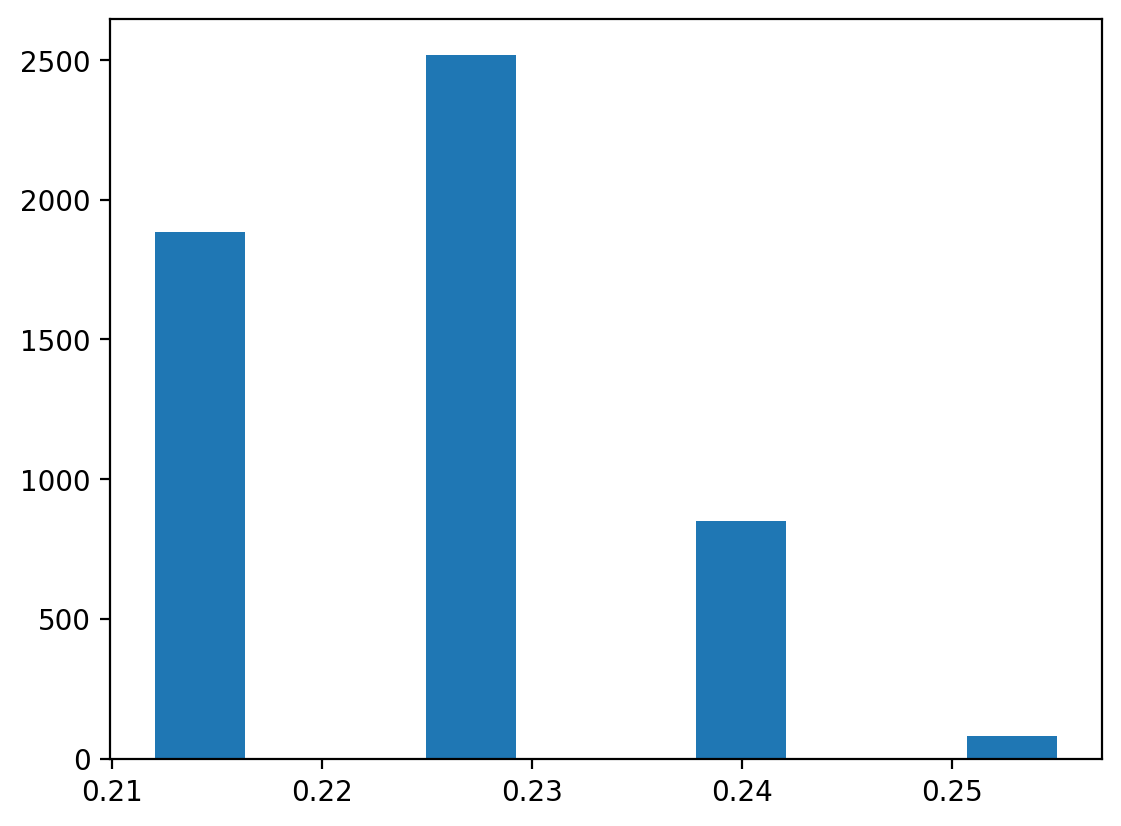

In [44]:
plt.hist(positive_proba)

In [45]:
mpl.rcParams['font.size'] = 12

Text(0, 0.5, 'Number of samples')

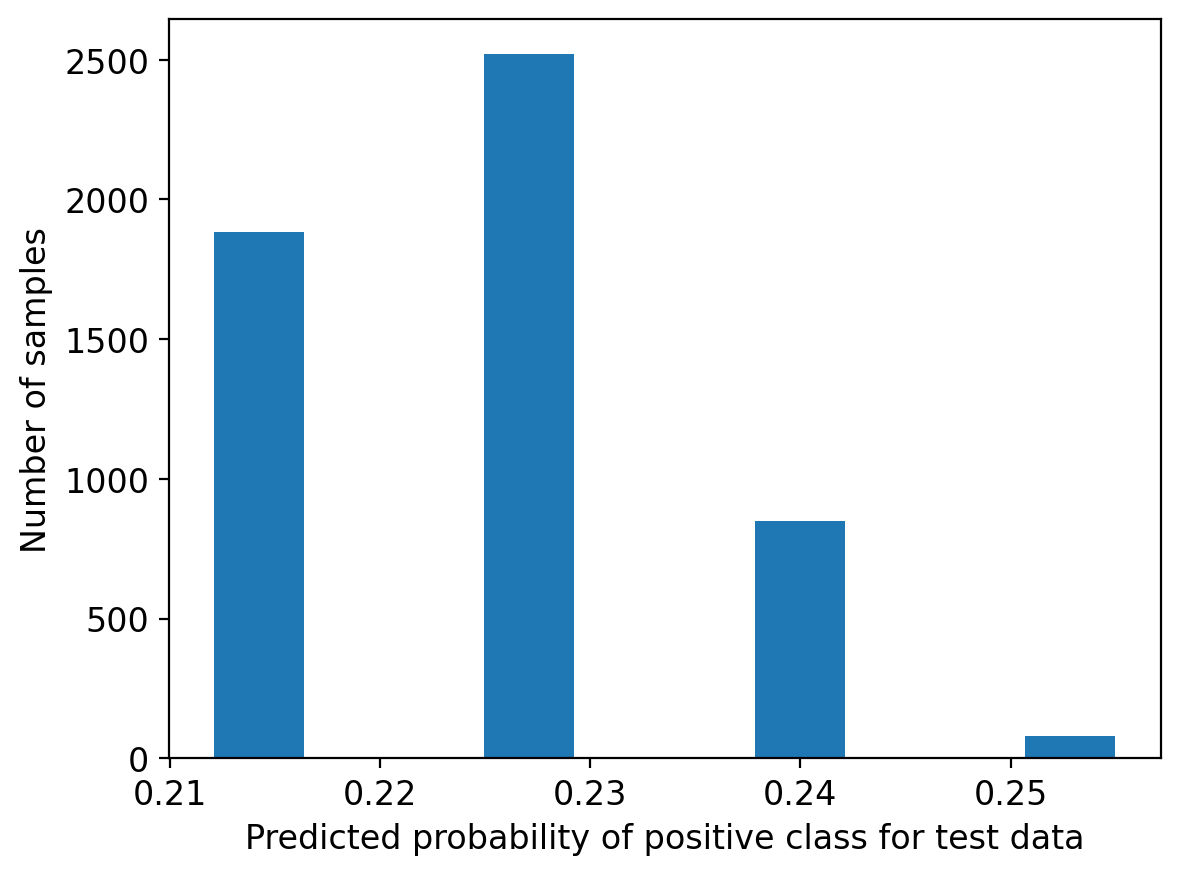

In [46]:
plt.hist(positive_proba)
plt.xlabel("Predicted probability of positive class for test data")
plt.ylabel("Number of samples")


Text(0, 0.5, 'Number of samples')

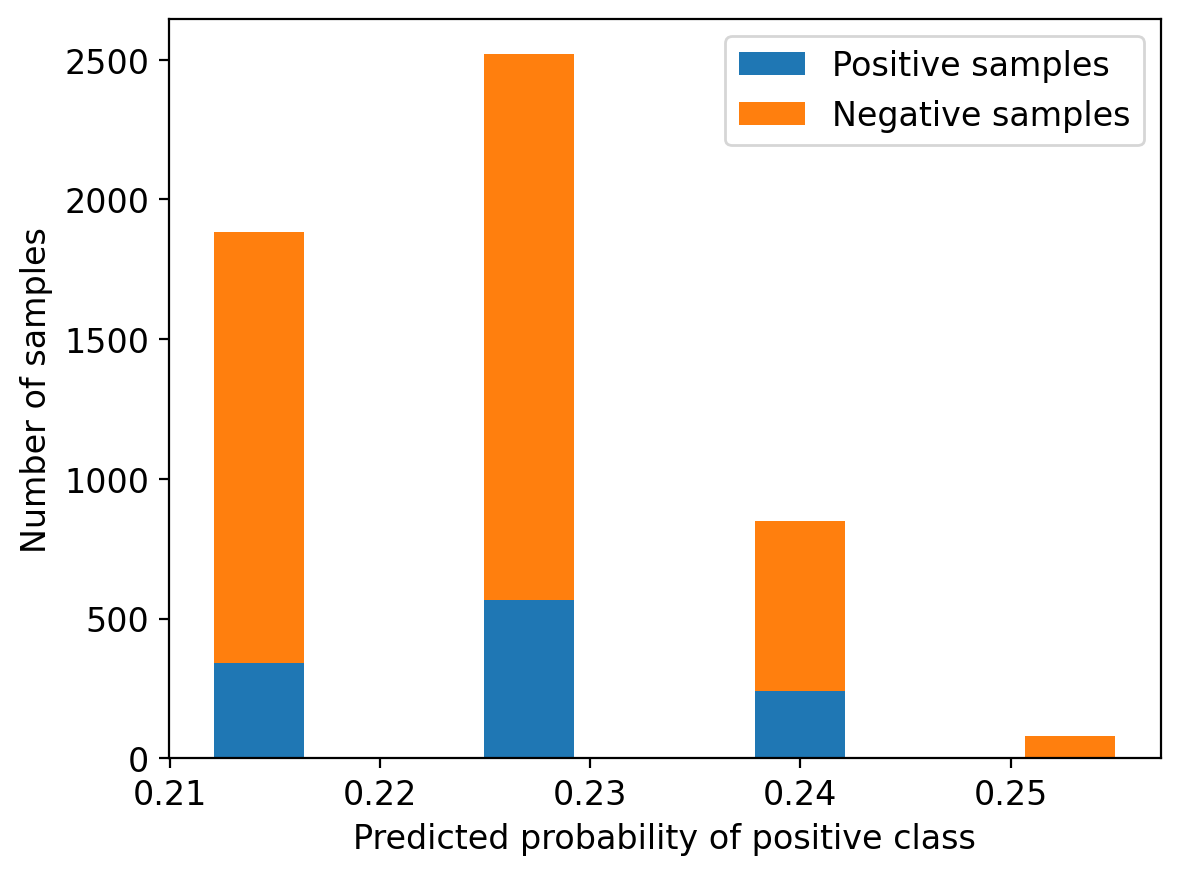

In [47]:
positive_sample_positive_proba = positive_proba[y_test == 1]
negative_sample_positive_proba = positive_proba[y_test == 0]
plt.hist([positive_sample_positive_proba, negative_sample_positive_proba], histtype = 'barstacked') 
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

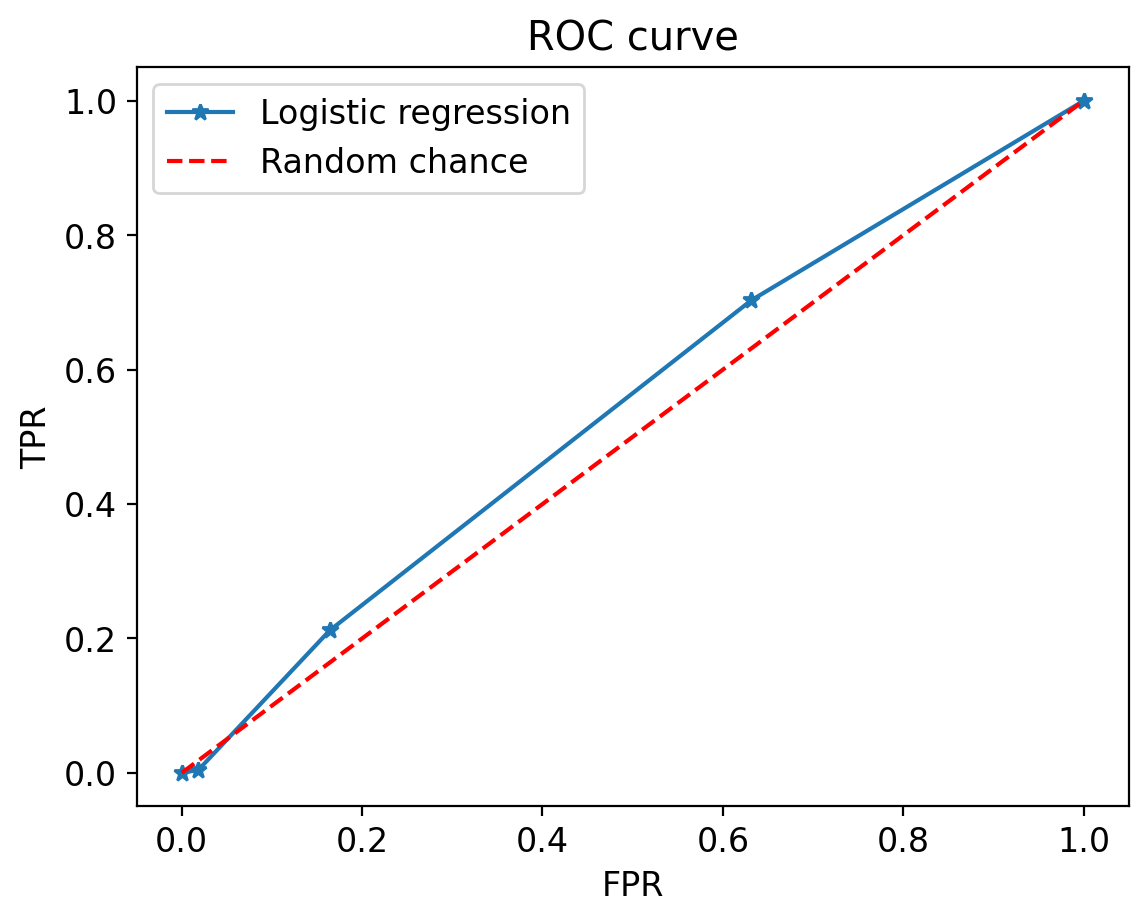

In [48]:
"""The ROC curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, positive_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [49]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [50]:
"""Calculating the ROC AUC"""
metrics.roc_auc_score(y_test, positive_proba)


0.5434650477972642

Exercise

In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'], test_size = 0.2, random_state = 24)

In [53]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [56]:
y_test_2_predict_proba = example_lr.predict_proba(X_test_2)

In [59]:
metrics.roc_auc_score(y_test_2, y_test_2_predict_proba[:,1])

0.6201990844642832

In [61]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_predict_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

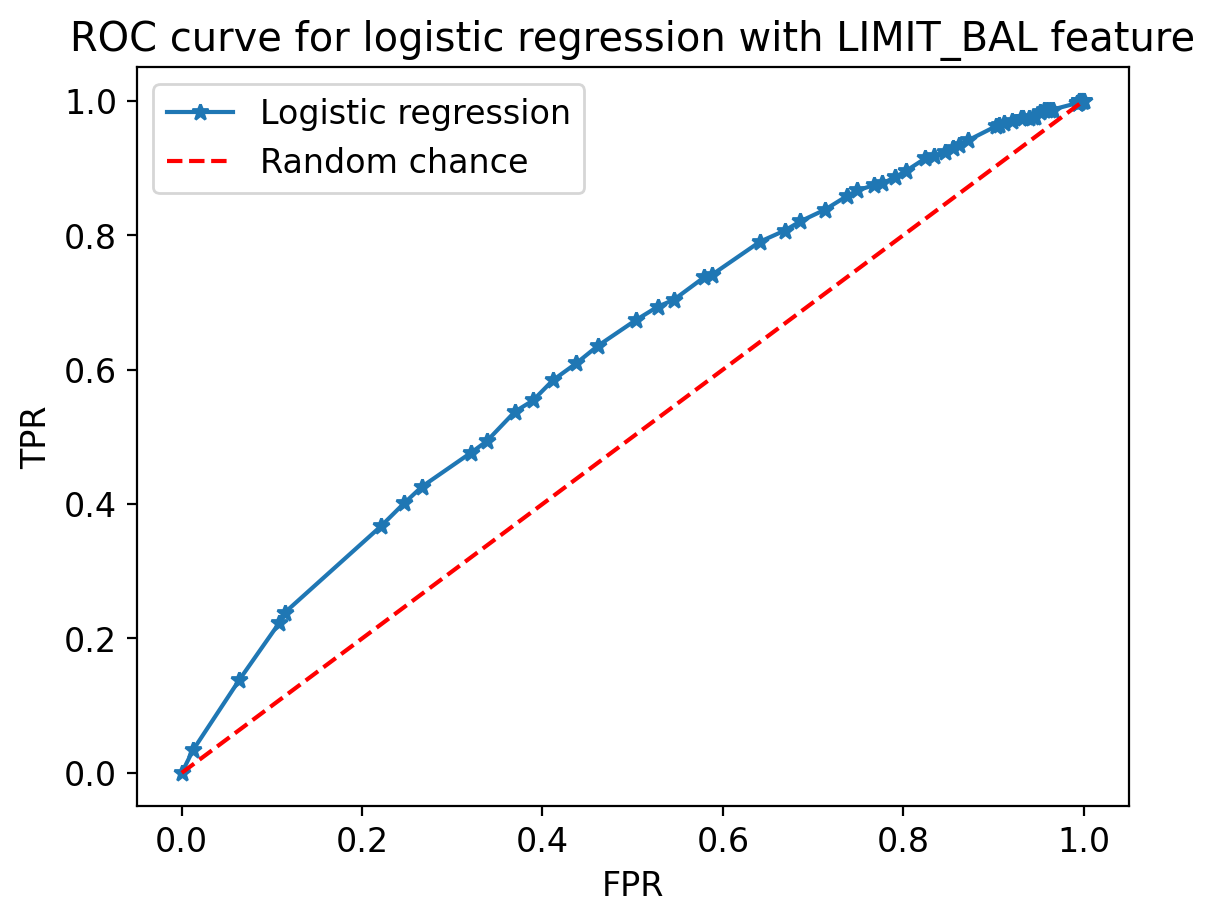

In [68]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [65]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_predict_proba[:,1])

(0.0, 1.0)

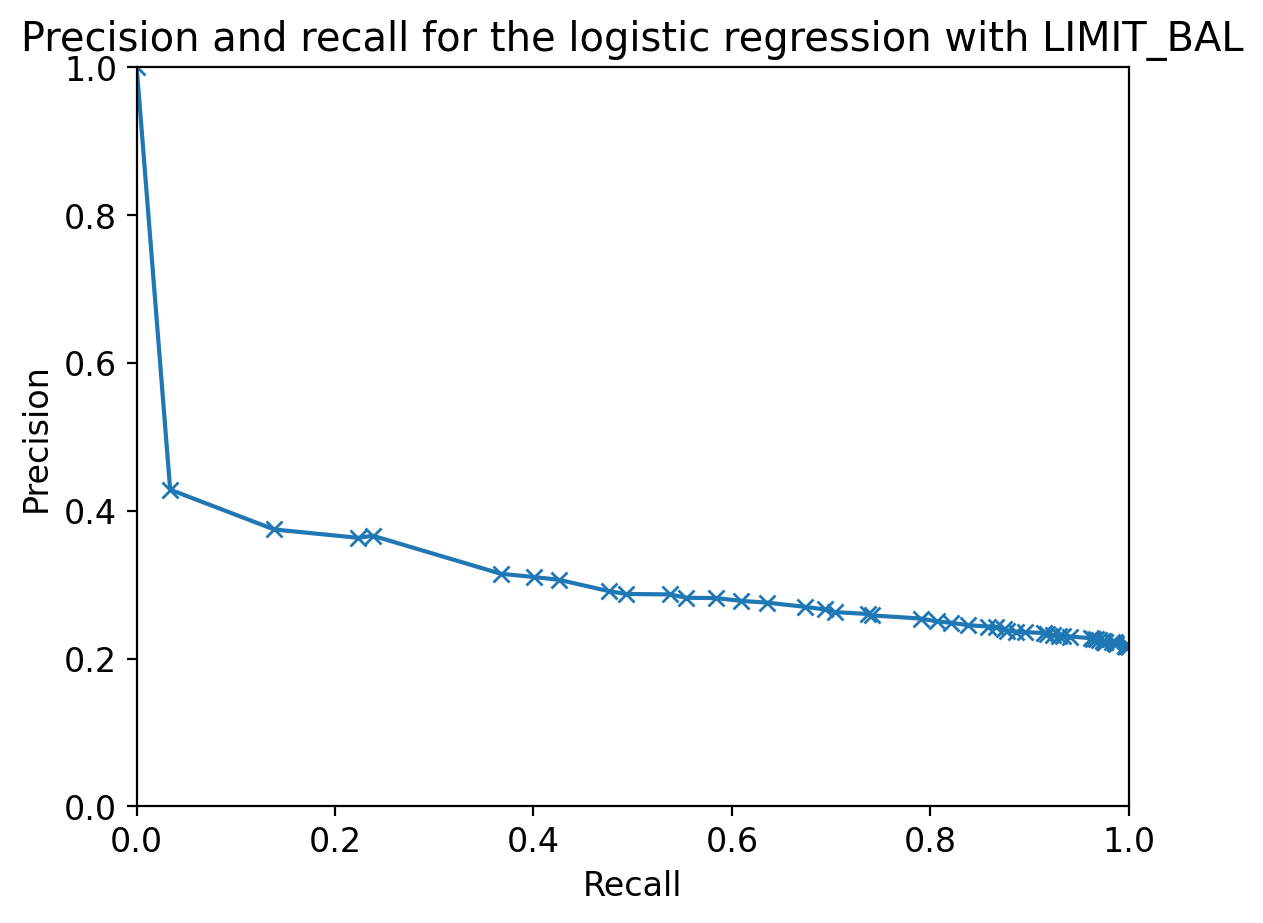

In [69]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

In [71]:
metrics.auc(recall, precision)

0.31566964427378624

In [73]:
y_train_2_predict_proba = example_lr.predict_proba(X_train_2)

In [75]:
metrics.roc_auc_score(y_train_2, y_train_2_predict_proba[:,1])

0.6182918113358344